We use the Original Wisconsin Breast Cancer Database from this website: https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original

In [ ]:
# import the dataset

!pip install ucimlrepo
import pandas as pd

from ucimlrepo import fetch_ucirepo

# fetch dataset
my_data = fetch_ucirepo(id=15)

# metadata
print(my_data.metadata)

{'uci_id': 15, 'name': 'Breast Cancer Wisconsin (Original)', 'repository_url': 'https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original', 'data_url': 'https://archive.ics.uci.edu/static/public/15/data.csv', 'abstract': 'Original Wisconsin Breast Cancer Database', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 699, 'num_features': 9, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['Class'], 'index_col': ['Sample_code_number'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1990, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C5HP4Z', 'creators': ['WIlliam Wolberg'], 'intro_paper': None, 'additional_info': {'summary': "Samples arrive periodically as Dr. Wolberg reports his clinical cases. The database therefore reflects this chronological grouping of the data. This grouping information appears immediately below, having been removed fro

In [ ]:
# describe my_data

# variable information
print(my_data.variables)

                           name     role         type demographic  \
0            Sample_code_number       ID  Categorical        None   
1               Clump_thickness  Feature      Integer        None   
2       Uniformity_of_cell_size  Feature      Integer        None   
3      Uniformity_of_cell_shape  Feature      Integer        None   
4             Marginal_adhesion  Feature      Integer        None   
5   Single_epithelial_cell_size  Feature      Integer        None   
6                   Bare_nuclei  Feature      Integer        None   
7               Bland_chromatin  Feature      Integer        None   
8               Normal_nucleoli  Feature      Integer        None   
9                       Mitoses  Feature      Integer        None   
10                        Class   Target       Binary        None   

                  description units missing_values  
0                        None  None             no  
1                        None  None             no  
2           

The feature n° 6 (Bare_nuclei) has missing values. How many? We have to *check*

In [ ]:
# prompt: How many missing values does Bare_nuclei have? Please check in my_data

# data (as pandas dataframes)
X = my_data.data.features
y = my_data.data.targets

# check the number of missing values in Bare_nuclei
missing_values = X['Bare_nuclei'].isnull().sum()
print(f"Number of missing values in 'Bare_nuclei': {missing_values}")

Number of missing values in 'Bare_nuclei': 16


The number of missing values is low. We can remove the rows with missing values

In [ ]:
# prompt: Remove rows with NA from X and remove the same rows in y

# Drop rows with NA values in X
X_cleaned = X.dropna()

# Get the indices of the rows that were NOT dropped from X
rows_to_keep = X_cleaned.index

# Use these indices to select the corresponding rows in y
y_cleaned = y.loc[rows_to_keep]

In [ ]:
# Count the number of samples in the cleaned dataset
print(X_cleaned.shape[0])
print(y_cleaned.shape[0])

683
683


In [ ]:
# Describe X
X_cleaned.describe()

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


The features have the same scale.

In [ ]:
# Decribe y
import numpy as n
#y_cleaned.value_counts() # integer
y_cleaned.value_counts(normalize=True) * 100 # percentage

,proportion
Class,
2,65.007321
4,34.992679


In [ ]:
# prompt: change '2' with '0' and '4' with '1' in y_cleaned. Than show y_cleaned

# Replace '2' with '0' and '4' with '1' in y_cleaned
y_cleaned = y_cleaned.replace(2, 0)
y_cleaned = y_cleaned.replace(4, 1)

# Show y_cleaned
y_cleaned

,Class
0,0
1,0
2,0
3,0
4,0
...,...
694,0
695,0
696,1
697,1


In [ ]:
# prompt: Create a train/test split on X_cleaned and y_cleaned

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, test_size=0.3, random_state=42) # the test_size changed to 0.3

In [ ]:
print(X_train.shape[0])
print(X_test.shape[0])

478
205


In [ ]:
# prompt: Train a Logistic Regression Classifier on X_train

from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression classifier
logreg_classifier = LogisticRegression(random_state=42)

# Train the classifier
logreg_classifier.fit(X_train, y_train['Class'])

LogisticRegression(random_state=42)

In [ ]:
# prompt: Calculate the accuracy, recall, specificity, precision, f1 on both train and test

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

# Predict on train and test sets
y_train_pred = logreg_classifier.predict(X_train)
y_test_pred = logreg_classifier.predict(X_test)

# Function to calculate and print metrics
def print_metrics(y_true, y_pred, label):
    accuracy = accuracy_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn+fp)

    print(f"Metrics for {label}:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  Specificity: {specificity:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  F1-score: {f1:.4f}")

# Print metrics for train set
print_metrics(y_train['Class'], y_train_pred, "Train Set")

# Print metrics for test set
print_metrics(y_test['Class'], y_test_pred, "Test Set")

Metrics for Train Set:
  Accuracy: 0.9728
  Recall: 0.9627
  Specificity: 0.9779
  Precision: 0.9568
  F1-score: 0.9598
Metrics for Test Set:
  Accuracy: 0.9561
  Recall: 0.9103
  Specificity: 0.9843
  Precision: 0.9726
  F1-score: 0.9404


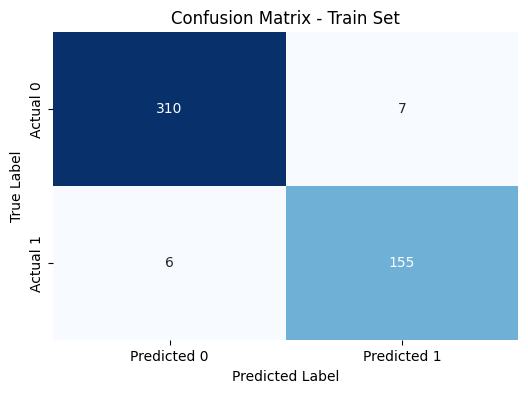

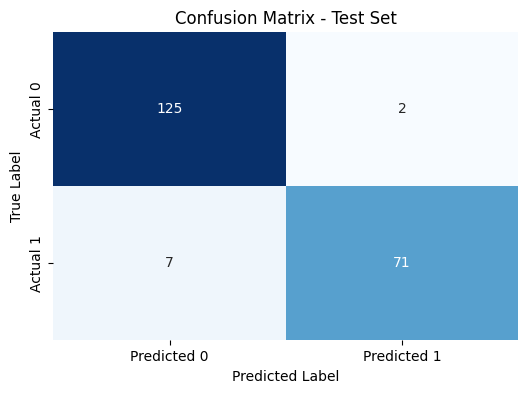

In [ ]:
# prompt: Create and plot confusion matrix in train and test

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_train, y_train_pred, y_test, and y_test_pred are already defined

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Plot confusion matrix for train set
plot_confusion_matrix(y_train['Class'], y_train_pred, "Confusion Matrix - Train Set")

# Plot confusion matrix for test set
plot_confusion_matrix(y_test['Class'], y_test_pred, "Confusion Matrix - Test Set")

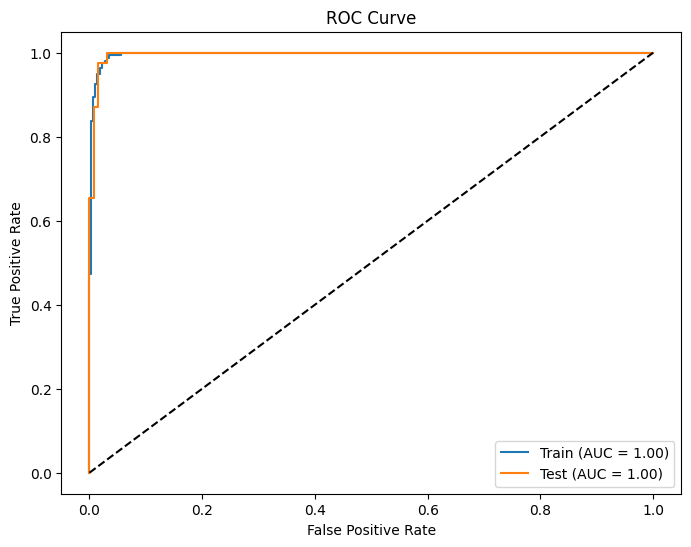

In [ ]:
# prompt: Create and plot ROC curve with ROC AUC for train and test

from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities for train and test sets
y_train_prob = logreg_classifier.predict_proba(X_train)[:, 1]
y_test_prob = logreg_classifier.predict_proba(X_test)[:, 1]

# Calculate ROC AUC for train and test sets
roc_auc_train = roc_auc_score(y_train['Class'], y_train_prob)
roc_auc_test = roc_auc_score(y_test['Class'], y_test_prob)

# Calculate ROC curves for train and test sets
fpr_train, tpr_train, _ = roc_curve(y_train['Class'], y_train_prob)
fpr_test, tpr_test, _ = roc_curve(y_test['Class'], y_test_prob)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'Train (AUC = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, label=f'Test (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

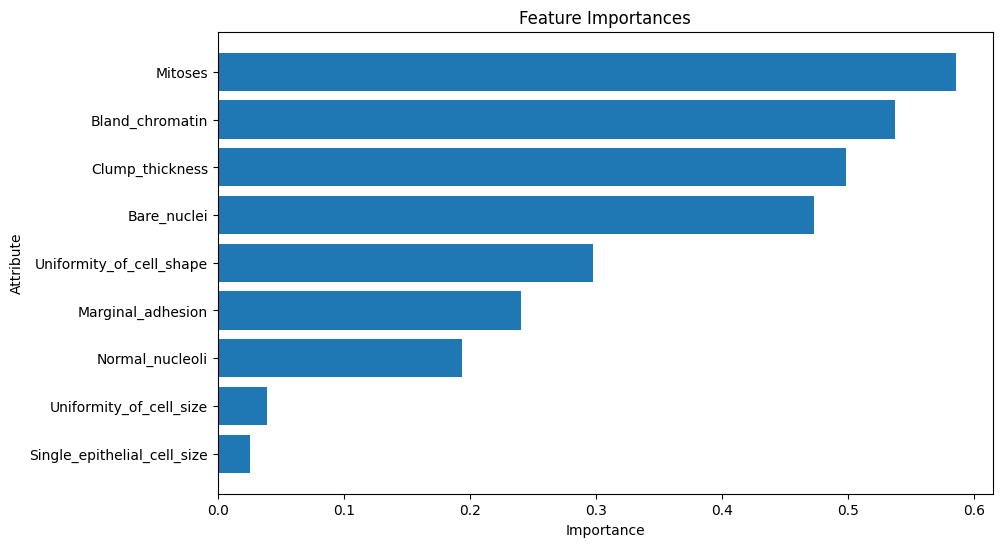

In [ ]:
# prompt: Show and plot feature importances of the previous model

import matplotlib.pyplot as plt
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(logreg_classifier.coef_[0])
})
importances = importances.sort_values(by='Importance', ascending=True)
plt.figure(figsize=(10, 6))
plt.barh(importances['Attribute'], importances['Importance'])
plt.xlabel("Importance")
plt.ylabel("Attribute")
plt.title("Feature Importances")
plt.show()

The last two features have coefficients much lower than the others. What would happen if you tried to train the model without the last two? Try it yourselves

Metrics for Train Set (Reduced Features):
  Accuracy: 0.9749
  Recall: 0.9627
  Specificity: 0.9811
  Precision: 0.9627
  F1-score: 0.9627
Metrics for Test Set (Reduced Features):
  Accuracy: 0.9561
  Recall: 0.9103
  Specificity: 0.9843
  Precision: 0.9726
  F1-score: 0.9404


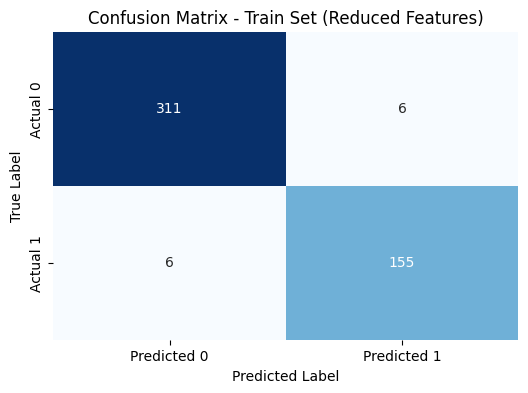

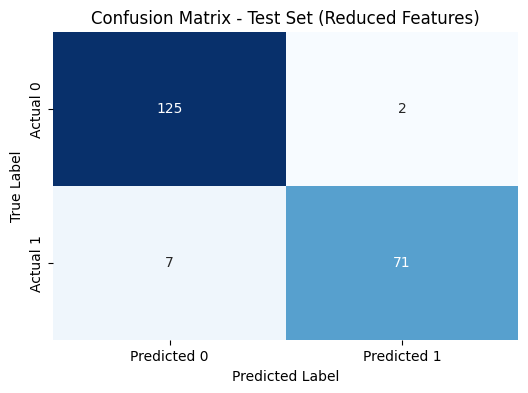

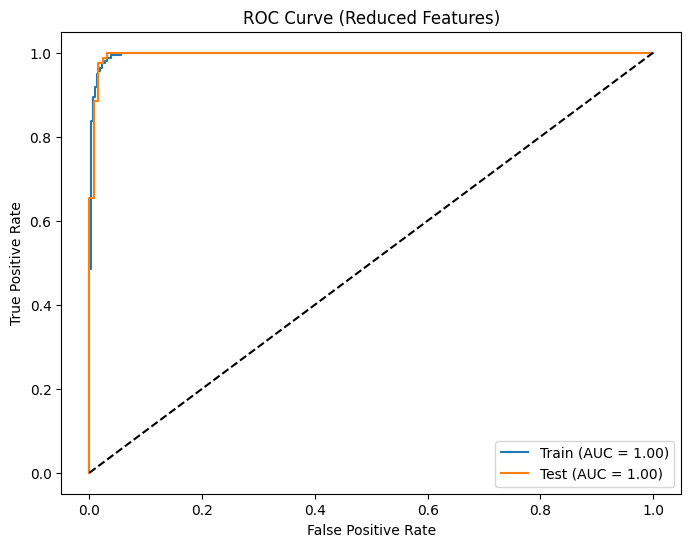

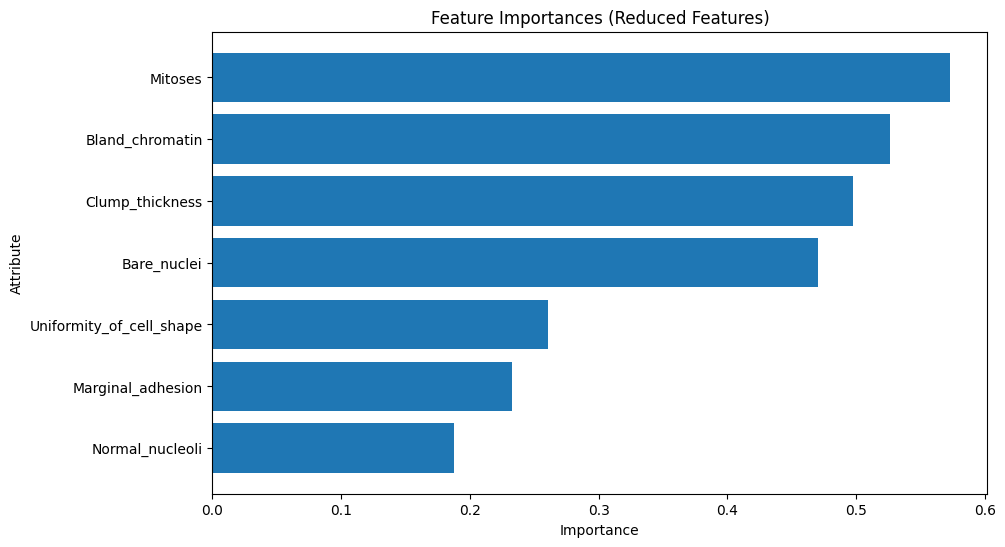

In [ ]:
# prompt: Train the same classifier without Uniformity_of_cell_size and Single_epithelial_cell _size

# Drop 'Uniformity_of_cell_size' and 'Single_epithelial_cell_size'
X_train_reduced = X_train.drop(['Uniformity_of_cell_size', 'Single_epithelial_cell_size'], axis=1)
X_test_reduced = X_test.drop(['Uniformity_of_cell_size', 'Single_epithelial_cell_size'], axis=1)

# Initialize and train the Logistic Regression classifier with reduced features
logreg_classifier_reduced = LogisticRegression(random_state=42)
logreg_classifier_reduced.fit(X_train_reduced, y_train['Class'])

# Predict on train and test sets with reduced features
y_train_pred_reduced = logreg_classifier_reduced.predict(X_train_reduced)
y_test_pred_reduced = logreg_classifier_reduced.predict(X_test_reduced)

# Print metrics for the reduced feature model
print_metrics(y_train['Class'], y_train_pred_reduced, "Train Set (Reduced Features)")
print_metrics(y_test['Class'], y_test_pred_reduced, "Test Set (Reduced Features)")

# Plot confusion matrices for the reduced feature model
plot_confusion_matrix(y_train['Class'], y_train_pred_reduced, "Confusion Matrix - Train Set (Reduced Features)")
plot_confusion_matrix(y_test['Class'], y_test_pred_reduced, "Confusion Matrix - Test Set (Reduced Features)")

# Predict probabilities and calculate ROC AUC and plot ROC curve for the reduced feature model
y_train_prob_reduced = logreg_classifier_reduced.predict_proba(X_train_reduced)[:, 1]
y_test_prob_reduced = logreg_classifier_reduced.predict_proba(X_test_reduced)[:, 1]

roc_auc_train_reduced = roc_auc_score(y_train['Class'], y_train_prob_reduced)
roc_auc_test_reduced = roc_auc_score(y_test['Class'], y_test_prob_reduced)

fpr_train_reduced, tpr_train_reduced, _ = roc_curve(y_train['Class'], y_train_prob_reduced)
fpr_test_reduced, tpr_test_reduced, _ = roc_curve(y_test['Class'], y_test_prob_reduced)

plt.figure(figsize=(8, 6))
plt.plot(fpr_train_reduced, tpr_train_reduced, label=f'Train (AUC = {roc_auc_train_reduced:.2f})')
plt.plot(fpr_test_reduced, tpr_test_reduced, label=f'Test (AUC = {roc_auc_test_reduced:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Reduced Features)')
plt.legend(loc='lower right')
plt.show()

# Feature importances for the reduced model
importances_reduced = pd.DataFrame(data={
    'Attribute': X_train_reduced.columns,
    'Importance': abs(logreg_classifier_reduced.coef_[0])
})
importances_reduced = importances_reduced.sort_values(by='Importance', ascending=True)
plt.figure(figsize=(10, 6))
plt.barh(importances_reduced['Attribute'], importances_reduced['Importance'])
plt.xlabel("Importance")
plt.ylabel("Attribute")
plt.title("Feature Importances (Reduced Features)")
plt.show()

In [ ]:
# Comparison: old and new
print_metrics(y_train['Class'], y_train_pred, "Train Set")
print_metrics(y_train['Class'], y_train_pred_reduced, "Train Set (Reduced Features)")
print_metrics(y_test['Class'], y_test_pred, "Test Set")
print_metrics(y_test['Class'], y_test_pred_reduced, "Test Set (Reduced Features)")

Metrics for Train Set:
  Accuracy: 0.9728
  Recall: 0.9627
  Specificity: 0.9779
  Precision: 0.9568
  F1-score: 0.9598
Metrics for Train Set (Reduced Features):
  Accuracy: 0.9749
  Recall: 0.9627
  Specificity: 0.9811
  Precision: 0.9627
  F1-score: 0.9627
Metrics for Test Set:
  Accuracy: 0.9561
  Recall: 0.9103
  Specificity: 0.9843
  Precision: 0.9726
  F1-score: 0.9404
Metrics for Test Set (Reduced Features):
  Accuracy: 0.9561
  Recall: 0.9103
  Specificity: 0.9843
  Precision: 0.9726
  F1-score: 0.9404
